<a href="https://colab.research.google.com/github/ruchiraravishankar/level-5-project/blob/main/imbalanced_data_3%2B4_3conv_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imbalanced data: same number of 0 and 1 datapoints, but within class 1, writer 085 has the majority (10) of datapoints while all other writers have an equal but lower number (4) of datapoints each

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import torch
import glob
import os
import pickle
from bs4 import BeautifulSoup
# data_path = '/Users/ruchiraravishankar/Downloads/iam_dataset/'
data_path = '/content/drive/MyDrive/iam_dataset/'

# print(glob.glob(data_path))

In [3]:
# path = '/Users/ruchiraravishankar/Downloads/iam_dataset/xml/*'
# path = data_path + 'xml/*'
# xml_path = glob.glob(path)
# print(len(xml_path))

In [4]:
# # for file in xml_path:
# # file = xml_path[0]
# # print(file)
# d = {}
# d_i = {}
# def get_form_metadata(file):
#     with open(file, 'r') as f:
#         data = f.read()
#     Bs_data = BeautifulSoup(data, "lxml")
#     form = Bs_data.find('form')
#     form_id = form.get('id')
#     writer_id = form.get('writer-id')
# #     print(form_id)
# #     print(writer_id)
#     d[writer_id] = form_id
#     d_i[form_id] = writer_id
# for file in xml_path:
#     get_form_metadata(file)
    
# print(d)
# print(d_i)


In [5]:
# a_file = open("/content/drive/MyDrive/iam_dataset/d.pkl", "wb")
# pickle.dump(d, a_file)
# a_file.close()

# b_file = open("/content/drive/MyDrive/iam_dataset/d_i.pkl", "wb")
# pickle.dump(d_i, b_file)
# b_file.close()

In [6]:
print(os.listdir(os.curdir))

['.config', 'drive', 'sample_data']


In [7]:

# a_file = open("/content/drive/MyDrive/iam_dataset/d.pkl", "rb")
# d = pickle.load(a_file)
# print(d)

b_file = open("/content/drive/MyDrive/iam_dataset/d_i.pkl", "rb")
d_i = pickle.load(b_file)
print(d_i)

{'e01-062': '213', 'e01-059': '213', 'e01-086': '214', 'e01-092': '215', 'e01-102': '215', 'e01-113': '216', 'e01-107': '216', 'e02-014': '219', 'e01-119': '217', 'e02-000': '218', 'e02-018': '220', 'e02-021': '221', 'e02-025': '222', 'e02-074': '223', 'e02-082': '224', 'e02-086': '225', 'e02-091': '226', 'e02-094': '227', 'e02-100': '228', 'e02-117': '229', 'e04-000': '158', 'e04-008': '230', 'e04-011': '231', 'e04-004': '230', 'e04-015': '231', 'e04-022': '232', 'e04-019': '232', 'e04-026': '233', 'e04-030': '233', 'e04-038': '234', 'e04-034': '234', 'e04-052': '235', 'e04-043': '235', 'e04-058': '236', 'e04-062': '237', 'e04-079': '238', 'e04-068': '237', 'e04-083': '239', 'e04-086': '240', 'e04-091': '241', 'e04-095': '241', 'e04-109': '242', 'e04-103': '242', 'e04-099': '241', 'e04-114': '242', 'e04-119': '243', 'e04-124': '243', 'e04-127': '243', 'e04-132': '241', 'e06-000': '206', 'e06-006': '202', 'e06-003': '204', 'e06-021': '206', 'e06-010': '203', 'e06-015': '204', 'e06-030'

In [8]:
# form_writer_list = list(d_i.items())

In [9]:
from collections import Counter

top_writers = []
num_writers = 50 # taking the top 50 writers
writers_counter = Counter(d_i.values())
for writer_id,_ in writers_counter.most_common(num_writers):
    top_writers.append(writer_id)

print(top_writers)

['000', '384', '551', '552', '588', '635', '670', '671', '152', '150', '151', '154', '153', '333', '334', '336', '337', '338', '339', '340', '341', '342', '343', '345', '344', '347', '346', '348', '349', '634', '155', '332', '335', '315', '118', '415', '209', '085', '567', '206', '202', '204', '203', '205', '207', '208', '247', '248', '273', '274']


In [10]:
top_forms = []
for form_id, author_id in d_i.items():
    if author_id in top_writers:
        top_forms.append(form_id)
print(top_forms)

['e06-000', 'e06-006', 'e06-003', 'e06-021', 'e06-010', 'e06-015', 'e06-030', 'e06-026', 'e06-033', 'e06-037', 'e06-046', 'e06-041', 'e06-053', 'e06-049', 'e07-000', 'e06-070', 'e07-079', 'e07-076', 'e07-086', 'e07-083', 'e07-090', 'e07-094', 'e07-105', 'e07-098', 'e07-101', 'e07-108', 'f04-007', 'f04-020', 'g03-049', 'g04-007', 'g04-011', 'g04-014', 'g04-017', 'g04-026', 'g04-032', 'g04-095', 'g06-011a', 'g05-098', 'g06-011b', 'g06-011c', 'g06-011e', 'g06-011f', 'g06-011g', 'g06-011h', 'g06-011i', 'g06-011j', 'g06-011k', 'g06-011l', 'g06-011n', 'g06-011m', 'g06-011p', 'g06-011o', 'g06-018a', 'g06-011r', 'g06-018c', 'g06-018d', 'g06-018b', 'g06-018g', 'g06-018f', 'g06-018e', 'g06-018h', 'g06-018i', 'g06-018l', 'g06-018j', 'g06-018k', 'g06-018n', 'g06-018m', 'g06-018o', 'g06-018p', 'g06-018r', 'g06-026b', 'g06-026a', 'g06-026e', 'g06-026d', 'g06-026c', 'g06-026g', 'g06-026f', 'g06-026i', 'g06-026h', 'g06-026j', 'g06-026l', 'g06-026k', 'g06-026o', 'g06-026m', 'g06-026n', 'g06-026r', 'g06

In [11]:
# for key, value in sorted(top_forms.items()):
#     print(key, len([item for item in value if item])) 

In [12]:
import os
import glob
import shutil

# Create temp directory to save writers' forms in (assumes files have already been copied if the directory exists)
temp_sentences_path = data_path + "/temp_sentences"
if not os.path.exists(temp_sentences_path):
    os.makedirs(temp_sentences_path)
    # Copy forms that belong to the top 50 most common writers to the temp directory
    original_sentences_path = data_path + "/sentences/**/**/*.png"
    for file_path in glob.glob(original_sentences_path):
        image_name = file_path.split('/')[-1]  
        file_name, _ = os.path.splitext(image_name)
        form_id = '-'.join(file_name.split('-')[0:2])
        if form_id in top_forms:
            shutil.copy2(file_path, temp_sentences_path + "/" + image_name)

In [13]:
img_files = np.zeros((0), dtype=str)
print(img_files)
img_targets = np.zeros((0), dtype=str)
print(img_targets)
sentence_dict = {}
path_to_files = os.path.join(temp_sentences_path, '*')
for file_path in glob.glob(path_to_files):
    img_files = np.append(img_files, file_path)
    file_name, _ = os.path.splitext(file_path.split('/')[-1]  )
    form_id = '-'.join(file_name.split('-')[0:2])
    for key in d_i:
        if key == form_id:
            img_targets = np.append(img_targets, d_i[form_id])
#             sentence_dict[d_i[form_id]] = form_id

[]
[]


In [14]:
print(img_files.shape)
print(img_targets.shape)

print(Counter(img_targets).keys())
print(Counter(img_targets).values())

(4901,)
(4901,)
dict_keys(['551', '552', '567', '315', '588', '634', '635', '670', '671', '340', '339', '341', '342', '343', '344', '345', '346', '347', '348', '332', '333', '334', '335', '336', '337', '338', '349', '274', '118', '384', '415', '247', '248', '273', '150', '151', '152', '153', '154', '155', '202', '203', '204', '205', '206', '207', '208', '209', '085', '000'])
dict_values([129, 127, 87, 73, 133, 134, 95, 116, 129, 83, 91, 101, 95, 81, 99, 107, 105, 86, 87, 82, 104, 89, 71, 82, 75, 80, 84, 45, 52, 117, 87, 60, 54, 45, 104, 99, 101, 111, 108, 95, 63, 43, 60, 55, 50, 56, 53, 71, 54, 693])


In [15]:
sen_dict = {}

for i in range(len(img_targets)):
    if img_targets[i] not in sen_dict.keys():
        sen_dict[img_targets[i]] = [img_files[i]]
    else:
        sen_dict[img_targets[i]].append(img_files[i])

In [16]:
print(len(sen_dict['207']))

56


In [17]:
# print(len(sen_dict.values()))
number_of = []
writer_ids = []
for key, value in sorted(sen_dict.items()):
    writer_ids.append(key)
    number_of.append(len([item for item in value if item]))
print(len(writer_ids))

50


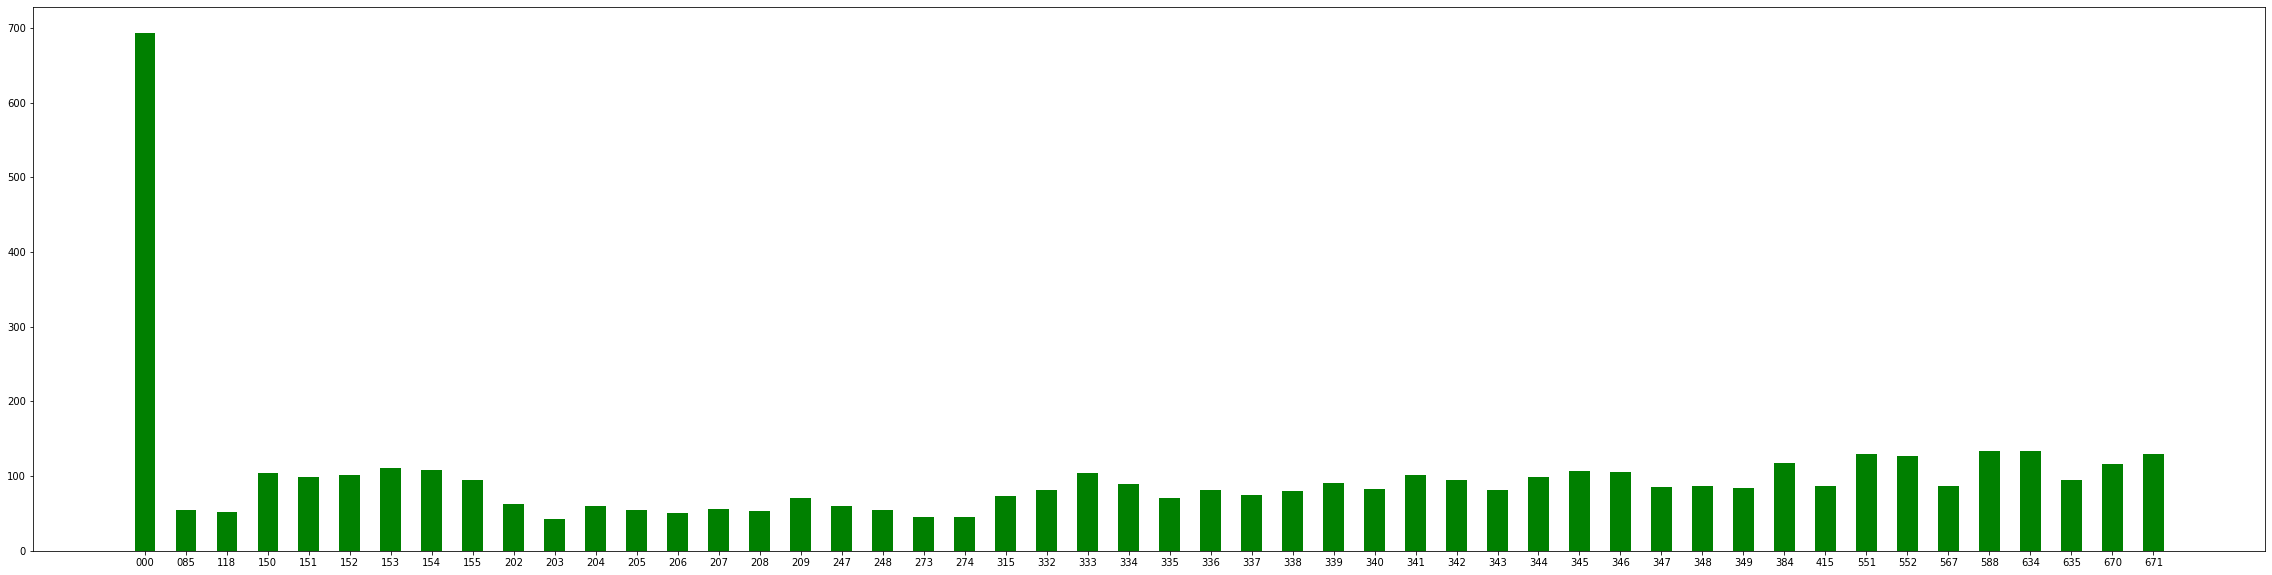

In [18]:
# crop so all images are of same size
# plot histogram 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(40,10))
plt.bar(writer_ids, number_of, width=0.5, color='g')
plt.show()

In [19]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# %matplotlib inline
# # img_files, img_targets
# img_shape_list = []
# for file_name in img_files:
#     img = mpimg.imread(file_name)
#     img_shape_list.append(img.shape)
#     plt.figure(figsize = (10,10))
#     plt.imshow(img, cmap ='gray')

In [20]:
# print(img_shape_list)

In [21]:
# arr = np.array(img_shape_list)
# print(arr.shape)

In [22]:
# print(arr.min(axis=0))

(47, 95)
(80, 1203)


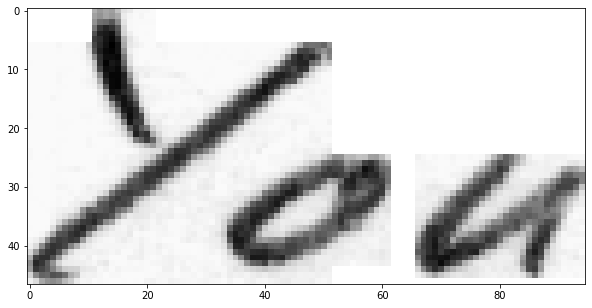

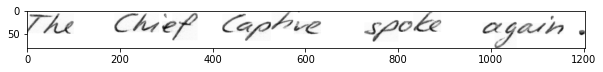

In [23]:
for file_name in img_files[:2]:
    img = mpimg.imread(file_name)
    plt.figure(figsize = (10,10))
    plt.imshow(img, cmap ='gray')
    print(img.shape)

In [24]:
# build a binary classifier on the writer id 000 and train on 0 and 1
# do the images have to be the same size?????????????????????????????
# train test split => equal number of 0s and 1s (500 and 500)
# 1000 data points -> 900 to train and 100 to test

In [25]:
writer_0_files = np.array(sen_dict['000'][:500])
print(writer_0_files.shape)

writer_0 = np.c_[writer_0_files, np.zeros(500)]

print(writer_0.shape)

(500,)
(500, 2)


In [26]:
print(writer_0[0])

['/content/drive/MyDrive/iam_dataset//temp_sentences/a01-000u-s00-02.png'
 '0.0']


In [27]:
labelled_data = np.stack([img_files, img_targets], axis=1)

print(labelled_data.shape)

(4901, 2)


In [28]:
# np.random.seed(42)
# all_writers = np.unique(labelled_data[:,1])

# print(all_writers.shape)

# np.unique(labelled_data[:,1])[np.unique(labelled_data[:,1])!= '000']
# # probs = np.random.dirichlet(np.ones(48),size=1.0)
# # print(probs.reshape(48,))
# # print(np.sum(probs))

# # np.insert(probs, )

from random import uniform as rand

def randConstrained(n, M):
     splits = [0] + [rand(0, 1) for _ in range(0,n-1)] + [1]
     splits.sort()
     diffs = [x - splits[i - 1] for i, x in enumerate(splits)][1:]
     result = map(lambda x:x*M, diffs)
     return result

res = randConstrained(49,1.0)
res_list = list(res)
# print(sum(list(res)))
print(len(res_list))
print(sum(res_list))

49
1.0


In [29]:
# HERE - work with labelled_data for any sampling work
probs = randConstrained(49,1.0)
print(probs)
probs = list(probs)
# print(probs)
probs = np.array(probs)
print(probs[0])
# probs = np.insert(probs, 0, 0.5)
print(probs[1])
print(probs.shape)
def sampling(p, n):
  all_1_writers = np.unique(labelled_data[:,1])[np.unique(labelled_data[:,1])!= '000']
  ixs = np.arange(49)
  return np.array([all_1_writers[np.random.choice(ixs, p=p)] for i in range(n)])


label_array = sampling(probs, 400) # change here to change no. of samples in class 1

labels, counts = np.unique(label_array, return_counts=True)

0.00100386609908798
0.016884292773745146
(49,)


In [30]:
print(labels, counts)
print(labels.shape)
print(sum(counts))

['085' '118' '150' '151' '152' '153' '154' '202' '203' '204' '206' '207'
 '208' '209' '247' '248' '273' '274' '315' '332' '333' '334' '336' '337'
 '338' '340' '341' '342' '344' '345' '346' '347' '348' '349' '384' '415'
 '552' '567' '588' '635' '670' '671'] [ 2  5  1 11 26  8 14  3  3  1  6 12 19 20 15 27  1  4  1 27  1 10  1  7
 16  3  7 16 18  3  4  3 21  2 24 12  4  2 13  7  7 13]
(42,)
400


In [31]:
# all_1_writers = np.unique(labelled_data[:,1])[np.unique(labelled_data[:,1])!= '000']
# print(all_1_writers)

In [32]:
all_1_data = labelled_data[labelled_data[:,1]!='000']

# all_085 = all_1_data[all_1_data[:,1]=='085']
# print(all_085.shape)

data_list = []
# data_list.append(all_085)
for i in range(len(labels)):
  curr = all_1_data[all_1_data[:,1]==labels[i]][:counts[i]]
  data_list.append(curr)

print(len(data_list))

42


In [33]:
# all_1_writers[1:]

In [34]:
# lbl_data = np.array(data_list)
out = np.concatenate(data_list)
# lbl_data = lbl_data.flatten()
# print(lbl_data)
print(out.shape)

(400, 2)


In [35]:
all_000 = labelled_data[labelled_data[:,1] == '000']
np.random.shuffle(all_000)
all_000 = all_000[:200] # change here to change no. of samples in class 0
print(all_000.shape)

(200, 2)


In [36]:
labelled_data = np.concatenate([all_000, out])
print(labelled_data.shape)

(600, 2)


In [37]:
from sklearn.utils import shuffle
from PIL import Image
import random

CROP_SIZE = 113
NUM_LABELS = 50

def get_augmented_sample(sample, label, sample_ratio):
    # Get current image details
    img = Image.open(sample)
    img_width = img.size[0]
    img_height = img.size[1]

    # Compute resize dimensions such that aspect ratio is maintained
    height_fac = CROP_SIZE / img_height
    size = (int(img_width * height_fac), CROP_SIZE)

    # Resize image 
    new_img = img.resize((size), Image.ANTIALIAS)
    new_img_width = new_img.size[0]
    new_img_height = new_img.size[1]

    # Generate a random number of crops of size 113x113 from the resized image
    x_coord = list(range(0, new_img_width - CROP_SIZE))
    num_crops = int(len(x_coord) * sample_ratio)
    random_x_coord = random.sample(x_coord, num_crops)
    
    # Create augmented images (cropped forms) and map them to a label (writer)
    images = []
    labels = []
    for x in random_x_coord:
        img_crop = new_img.crop((x, 0, x + CROP_SIZE, CROP_SIZE))
        # Transform image to an array of numbers
        images.append(np.asarray(img_crop))
        labels.append(label)

    return images, labels

In [38]:
transformed, labels = get_augmented_sample(labelled_data[0,0], labelled_data[0,1],0.05)

In [39]:
print(len(transformed))

146


In [40]:
# labelled_data_0 = labelled_data[labelled_data[:,1] == '000']

# print(labelled_data_0.shape)

# labelled_data_0 = labelled_data_0[:202]
# print(labelled_data_0.shape)

# print(np.unique(labelled_data_0[:,1]))

In [41]:
# remove_000 = labelled_data[labelled_data[:,1]!='000']

# print(np.unique(remove_000[:,1]))
# print(np.unique(remove_000[:,1]).shape)

In [42]:
# to select random values from class 1 but since no prob dist is given, they all have equal probability so mostly all equal numbers selected, useless
# # np.random.shuffle(remove_000)
# print(remove_000.shape)
# idx = np.random.randint(4208, size=202)
# labelled_data_1 = remove_000[idx,:]
# print(labelled_data_1.shape)

In [43]:
# old way of selecting equal number of class values
# y = [remove_000[remove_000[:,1]==k] for k in np.unique(remove_000[:,1])]
# print(len(y))

In [44]:
# old way of selecting equal number of class values
# labelled_data_1 = []
# for i in range(len(y)):
#     if i == 0:
#       labelled_data_1.append(y[i][:10])
#     else:
#       labelled_data_1.append(y[i][:4])
# print(len(labelled_data_1))

# labelled_data_1 = np.concatenate(labelled_data_1)

# print(labelled_data_1.shape)

In [45]:
# print(labelled_data_1.shape)

In [46]:
# not important or required
# lbl_data_1_dict = {}

# for i in range(len(labelled_data_1)):
#     if labelled_data_1[i] not in lbl_data_1_dict.keys():
#         sen_dict[img_targets[i]] = [img_files[i]]
#     else:
#         sen_dict[img_targets[i]].append(img_files[i])

In [47]:
# plt.figure(figsize=(40,10))
# plt.bar(labelled_data_1[:,1], labelled_data[:,0], width=0.5, color='g')
# plt.show()

In [48]:
# print(np.unique(labelled_data_1[:,1]))

In [49]:
# just for this file...
labelled_data_new = labelled_data
# labelled_data_new = np.concatenate((labelled_data_0, labelled_data_1))
# np.random.shuffle(labelled_data_new)
# print(labelled_data_new.shape) # mix of sentences from writer id 0 and others, labelled

In [50]:
# split before augmenting to ensure the sentences are being split and not the augmented samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(labelled_data_new[:,0], labelled_data_new[:,1], test_size=0.33, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(402,) (198,) (402,) (198,)


In [51]:
def augment(data, labels):
    augmented_sample_list = []
    augmented_label_list = []
    for i in range(len(data)):
        augmented_samples, augmented_labels = get_augmented_sample(data[i], labels[i],0.1)
        augmented_sample_list.append(augmented_samples)
        augmented_label_list.append(augmented_labels)
    return augmented_sample_list, augmented_label_list

In [52]:
augsamps, auglbls = augment(X_train, y_train) # returns two lists of arrays
augsamps_test, auglbls_test = augment(X_test, y_test)
# augsamps_val, auglbls_val = augment(X_val, y_val)

In [53]:
import operator
from functools import reduce

# flattening the lists
aug_samps = reduce(operator.add, augsamps)
aug_lbls = reduce(operator.add, auglbls)

aug_samps_test = reduce(operator.add, augsamps_test)
aug_lbls_test = reduce(operator.add, auglbls_test)

# aug_samps_val = reduce(operator.add, augsamps_val)
# aug_lbls_val = reduce(operator.add, auglbls_val)

print(len(aug_samps))
print(len(aug_lbls))

print(len(aug_samps_test))
print(len(aug_lbls_test))

# print(len(aug_samps_val))
# print(len(aug_lbls_val))

60785
60785
30054
30054


In [54]:
# converting lists to arrays
aug_samps_arr = np.array(aug_samps)
aug_lbls_arr = np.array(aug_lbls)
aug_samps_arr_test = np.array(aug_samps_test)
aug_lbls_arr_test = np.array(aug_lbls_test)
# aug_samps_arr_val = np.array(aug_samps_val)
# aug_lbls_arr_val = np.array(aug_lbls_val)

print(aug_samps_arr.shape)
print(aug_lbls_arr.shape)
print(aug_samps_arr_test.shape)
print(aug_lbls_arr_test.shape)
# print(aug_samps_arr_val.shape)
# print(aug_lbls_arr_val.shape)

(60785, 113, 113)
(60785,)
(30054, 113, 113)
(30054,)


In [55]:
# node = "1"
# print("hello")
# data_path = "/content/drive/MyDrive/iam_dataset/data/node"+node+"/"
# print(path+"X_train_node_"+node+".csv")

# if not os.path.exists(data_path):
#     os.makedirs(data_path)
# print(data_path)
# print(path+"X_train_node_"+node+".csv")
# np.savetxt(path+"X_train_node_"+node+".csv", X_train, delimiter=",")
# np.savetxt(path+"X_test_node_"+node+".csv", X_test, delimiter=",")
# np.savetxt(path+"X_val_node_"+node+".csv", X_val, delimiter=",")


# np.savetxt(path+"y_train_node_"+node+".csv", y_train, delimiter=",")
# np.savetxt(path+"y_test_node_"+node+".csv", y_test, delimiter=",")
# np.savetxt(path+"y_val_node_"+node+".csv", y_val, delimiter=",")

In [56]:
def transform_data_aug_samps(data):
  data = data.reshape(data.shape[0], 1, CROP_SIZE, CROP_SIZE)
  data = data.astype('float16')
  data /= 255.0
  return data

In [57]:
X_train = transform_data_aug_samps(aug_samps_arr)
# X_val = transform_data_aug_samps(aug_samps_arr_val)
X_test = transform_data_aug_samps(aug_samps_arr_test)

In [58]:
def convert_y_labels(labels):
  new = np.unique(labels)
  print(new)

  labels[labels !='000'] = 1
  new = np.unique(labels)
  print(new)

  labels[labels=='000'] = 0
  new = np.unique(labels)
  print(new)

  print(labels.shape)

  labels = labels.astype('float16')

  print(np.unique(labels))
  return labels

In [59]:
y_train = convert_y_labels(aug_lbls_arr)
y_test = convert_y_labels(aug_lbls_arr_test)
# y_val = convert_y_labels(aug_lbls_arr_val)

['000' '085' '118' '150' '151' '152' '153' '154' '202' '203' '204' '206'
 '207' '208' '209' '247' '248' '273' '274' '315' '332' '333' '334' '336'
 '337' '338' '340' '341' '342' '344' '345' '346' '347' '348' '349' '384'
 '415' '552' '567' '588' '635' '670' '671']
['000' '1']
['0' '1']
(60785,)
[0. 1.]
['000' '118' '151' '152' '153' '154' '202' '203' '206' '207' '208' '209'
 '247' '248' '274' '332' '334' '337' '338' '340' '341' '342' '344' '346'
 '347' '348' '349' '384' '415' '552' '567' '588' '635' '670' '671']
['000' '1']
['0' '1']
(30054,)
[0. 1.]


In [60]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# print(X_val.shape)
# print(y_val.shape)

(60785, 1, 113, 113)
(60785,)
(30054, 1, 113, 113)
(30054,)


In [61]:
torch.manual_seed(42)
CUDA = True
device = torch.device('cuda' if CUDA else 'cpu')
kwargs = {'num_workers': 1, 'pin_memory': True} if CUDA else {}
device

device(type='cuda')

In [62]:
from torch.utils.data import TensorDataset, DataLoader


tensor_x_train = torch.Tensor(X_train).type(torch.cuda.FloatTensor) # transform to torch tensor
tensor_y_train = torch.Tensor(y_train).type(torch.cuda.FloatTensor).long()



# tensor_x_train = torch.Tensor(X_train) # transform to torch tensor
# tensor_y_train = torch.Tensor(y_train).long()

train_dataset = TensorDataset(tensor_x_train,tensor_y_train) # create your datset
train_dataloader = DataLoader(train_dataset,batch_size=16, shuffle=True, drop_last=True) # create your dataloader

In [63]:
# tensor_x_val = torch.Tensor(X_val).type(torch.cuda.FloatTensor) # transform to torch tensor
# tensor_y_val = torch.Tensor(y_val).type(torch.cuda.FloatTensor).long()
# # tensor_x_train = torch.Tensor(X_train) # transform to torch tensor
# # tensor_y_train = torch.Tensor(y_train).long()

# val_dataset = TensorDataset(tensor_x_val,tensor_y_val) # create your datset
# val_dataloader = DataLoader(val_dataset,batch_size=16, shuffle=True, drop_last=True) # create your dataloader

In [64]:
tensor_x_test = torch.Tensor(X_test).type(torch.cuda.FloatTensor) # transform to torch tensor
tensor_y_test = torch.Tensor(y_test).long().type(torch.cuda.FloatTensor).long()

# tensor_x_test = torch.Tensor(X_test) # transform to torch tensor
# tensor_y_test = torch.Tensor(y_test).long()

test_dataset = TensorDataset(tensor_x_test,tensor_y_test) # create your datset
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, drop_last=True) # create your dataloader

In [65]:
tensor_x_train.shape

torch.Size([60785, 1, 113, 113])

In [66]:
# import torch
from torch import nn
class Binary_Classifier(nn.Module): 
    def __init__(self):
        super(Binary_Classifier, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        self.conv_drop = nn.Dropout2d()
        self.conv3 = nn.Conv2d(20, 30, kernel_size=3)
        self.fc1 = nn.Linear(4320, 1024)
        self.fc2 = nn.Linear(1024, 2)
        self.relu = nn.ReLU()
        self.max_pool2d = nn.MaxPool2d(2)
    def forward(self, x):
        x = self.relu(self.max_pool2d(self.conv1(x)))
        x = self.relu(self.max_pool2d(self.conv_drop(self.conv2(x))))
        x = self.relu(self.max_pool2d(self.conv_drop(self.conv3(x))))
        x = x.view(x.shape[0],-1)
        # print(x.shape)
        x = self.relu(self.fc1(x))
        x = self.conv_drop(x)
        x = self.fc2(x)
        return x

In [67]:
model=Binary_Classifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0001)

# import torch.optim.lr_scheduler.StepLR
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)


In [68]:
save_path = "/content/drive/MyDrive/iam_dataset/saved_model"

In [69]:
if os.path.exists(save_path+'/model_3_convs.pt'):
    print('Loading checkpoint: %s' % save_path +'/model_3_convs.pt')
    path = torch.load(save_path +'/model_3_convs.pt', map_location=torch.device(device))
    epoch = path['epoch']
    model.load_state_dict(path['model'])
    optimizer.load_state_dict(path['optimizer'])
else:
    print("nothing happened")

Loading checkpoint: /content/drive/MyDrive/iam_dataset/saved_model/model_3_convs.pt


In [70]:
print(model.parameters)

<bound method Module.parameters of Binary_Classifier(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (conv_drop): Dropout2d(p=0.5, inplace=False)
  (conv3): Conv2d(20, 30, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=4320, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=2, bias=True)
  (relu): ReLU()
  (max_pool2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)>


In [71]:
print(device)

cuda


In [72]:
# for param in model.parameters():
#   param.requires_grad = False

In [73]:
# for param in model.conv3.parameters():
#   param.requires_grad = True

In [74]:
# num_ftrs = model.fc2.in_features
# print(num_ftrs)
# model.fc2 = nn.Linear(num_ftrs, 2).to(device)

In [75]:
# for param in model.parameters():
#   print(param.requires_grad)

In [76]:
train_losses = []
train_loss_record = []

In [77]:
from datetime import datetime
train_log_string = '%s :: Epoch %i :: Iter %i / %i :: train loss: %0.4f'
def train(epoch):
    print('Start Epoch {} Training...'.format(epoch))
    model.train()
    train_loss = []
    train_loss_sum = []
    for idx, (data, target) in enumerate(train_dataloader):
        optimizer.zero_grad()
        #  forward-pass
        output = model(data)
        loss = criterion(output, target)
        #backward-pass
        loss.backward()
        # Update the parameters
        optimizer.step()
        train_loss.append(loss.data.cpu().numpy())
        train_loss_sum.append(loss)
        if ((idx +1) % 5000) == 0:
          print(train_log_string % (datetime.now(), epoch, idx + 1, len(train_dataloader), np.mean(train_loss)))
          train_loss = []
    mean_tr = torch.mean(torch.stack(train_loss_sum))
    print('Train Loss at epoch {}: {}\n'.format(epoch, mean_tr))
    train_loss_record.append(mean_tr)
    return train_loss_record

In [78]:
# for epoch in range(15):
#     tlr = train(epoch)

In [79]:
# import matplotlib.pyplot as plt
# temp = [t.detach().cpu().numpy() for t in tlr]
# arr = np.array(temp)
# print(arr.shape)

# plt.plot(arr)

In [80]:
# state_dict = {
#     'epoch': epoch,
#     'model': model.state_dict(),
#     'optimizer': optimizer.state_dict(),
# }
# torch.save(state_dict, save_path+'/3convs_node6_fc.pt')
# print('Model saved!\n')

In [81]:
result = []
prediction = []
model.eval()
with torch.no_grad():
    for idx, (data, target) in enumerate(test_dataloader):
        output = model(data)
        output_sm = nn.Softmax(dim=1)(output)
        _, predicted = torch.max(output, 1)
        prediction.append(predicted)
        result.append(output_sm)
        
result = torch.stack(result).detach().cpu().numpy()
prediction = torch.stack(prediction).detach().cpu().numpy()

print(result.shape, prediction.shape)

(1878, 16, 2) (1878, 16)


In [82]:
print(prediction.reshape(-1).shape)

(30048,)


In [83]:
import pandas as pd
res = pd.DataFrame(result.reshape(-1,2))
pred = pd.DataFrame(prediction.reshape(-1))

# res.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/results_imbal_4_conv_3_transf_conv.csv", header=False, index=False)
# pred.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/pred_imbal_4_conv_3_transf_conv.csv", header=False, index=False)

In [84]:
print(res.shape, pred.shape)

(30048, 2) (30048, 1)


In [85]:
y_test_new = y_test[:result.reshape(-1,2).shape[0]]

In [86]:
print(y_test_new.shape)

(30048,)


In [87]:
result_df = pd.DataFrame({'ground truth': y_test_new, 'NN output': prediction.reshape(-1), 'probs 0': res[0], 'probs 1': res[1]})
result_df

,ground truth,NN output,probs 0,probs 1
0,0.0,0,0.999570,4.295346e-04
1,0.0,0,0.999997,2.544678e-06
2,0.0,0,1.000000,1.388911e-07
3,0.0,0,0.999995,5.274888e-06
4,0.0,0,0.821748,1.782524e-01
...,...,...,...,...
30043,1.0,1,0.115268,8.847322e-01
30044,1.0,1,0.123394,8.766058e-01
30045,1.0,1,0.036085,9.639150e-01
30046,1.0,1,0.041854,9.581459e-01


In [88]:
# work out the accuracy and other metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
actual = result_df['ground truth']
predicted = result_df['NN output']
# confusion matrix
matrix = confusion_matrix(actual, predicted, labels=[0,1])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tn, fp, fn, tp = confusion_matrix(actual, predicted, labels=[0,1]).reshape(-1)
print('Outcome values : \n', tn, fp, fn, tp)

# tn, fp, fn, tp

# classification report for precision, recall f1-score and accuracy
matrix_2 = classification_report(actual,predicted,labels=[0,1])
print('Classification report : \n',matrix_2)

Confusion matrix : 
 [[13276   417]
 [ 1416 14939]]
Outcome values : 
 13276 417 1416 14939
Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94     13693
           1       0.97      0.91      0.94     16355

    accuracy                           0.94     30048
   macro avg       0.94      0.94      0.94     30048
weighted avg       0.94      0.94      0.94     30048



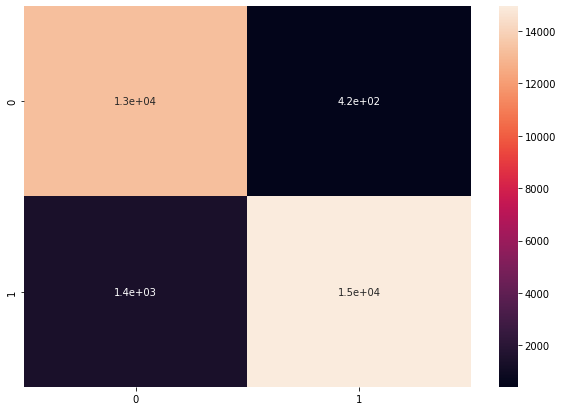

In [89]:
import matplotlib.pyplot as plt

import seaborn as sn
df_cm = pd.DataFrame(matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(matrix, annot=True)

In [90]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
matrix_3 = classification_report(actual,predicted,labels=[0,1], output_dict=True)
print('Classification report : \n',matrix_3)
accuracy_score(actual, predicted)

Classification report : 
 {'0': {'precision': 0.9036210182412198, 'recall': 0.9695464836047616, 'f1-score': 0.9354236392460807, 'support': 13693}, '1': {'precision': 0.9728444907528002, 'recall': 0.9134209721797616, 'f1-score': 0.9421967140739806, 'support': 16355}, 'accuracy': 0.9389976038338658, 'macro avg': {'precision': 0.9382327544970099, 'recall': 0.9414837278922616, 'f1-score': 0.9388101766600307, 'support': 30048}, 'weighted avg': {'precision': 0.9412990631336219, 'recall': 0.9389976038338658, 'f1-score': 0.9391101953832713, 'support': 30048}}


0.9389976038338658

In [91]:
matrix_df = pd.DataFrame(matrix).transpose()
matrix_3_df = pd.DataFrame(matrix_3).transpose()
# matrix_df.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/conf_matrix_imbal_4_3conv_transf_conv.csv", header=False, index=False)
matrix_3_df.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/classification_report_node6_3conv_pi.csv", header=True, index=True)

# pd.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/classification_report.txt",matrix)
